# **TechNova Attrition Prediction**

Imports

In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
from imblearn.over_sampling import SMOTE
from scipy.sparse import issparse
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, f1_score, precision_score, recall_score
import xgboost as xgb
import shap


# EDA (Exploratory Data Analysis)

**Load Data**


The dataset has been successfully loaded for analysis.  
At this stage, I verify basic structure — number of rows, columns, and data types — to ensure correct import.  
This helps identify potential issues like missing values, mixed data types, or incorrect encodings before deeper exploration.


In [4]:
df= pd.read_csv("employee_churn_dataset.csv")

In [5]:
df.head()

,Employee ID,Age,Gender,Education Level,Marital Status,Tenure,Job Role,Department,Salary,Work Location,...,Training Hours,Promotions,Overtime Hours,Satisfaction Level,Work-Life Balance,Average Monthly Hours Worked,Absenteeism,Distance from Home,Manager Feedback Score,Churn
0,E00001,50,Male,Bachelor's,Married,5,Analyst,Marketing,93422,Remote,...,35,0,16,0.03,Poor,155,14,15,7.9,0
1,E00002,36,Male,Bachelor's,Married,4,Manager,Sales,44589,On-site,...,1,0,12,0.39,Average,162,2,8,5.2,0
2,E00003,29,Male,Bachelor's,Married,3,Sales,IT,56768,Hybrid,...,41,0,2,0.62,Poor,243,6,21,6.3,0
3,E00004,42,Male,Bachelor's,Single,12,Analyst,Sales,79009,On-site,...,33,0,8,0.73,Good,291,11,25,7.4,0
4,E00005,40,Other,Bachelor's,Married,1,Sales,HR,81982,On-site,...,30,0,13,0.52,Average,272,3,1,4.1,0


Handle missing data

In [6]:
df.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Education Level,0
Marital Status,0
Tenure,0
Job Role,0
Department,0
Salary,0
Work Location,0


Check for duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Education Level', 'Marital Status',
       'Tenure', 'Job Role', 'Department', 'Salary', 'Work Location',
       'Performance Rating', 'Projects Completed', 'Training Hours',
       'Promotions', 'Overtime Hours', 'Satisfaction Level',
       'Work-Life Balance', 'Average Monthly Hours Worked', 'Absenteeism',
       'Distance from Home', 'Manager Feedback Score', 'Churn'],
      dtype='object')

Remove unnecessary columns

In [9]:
df.drop("Employee ID",axis=1,inplace=True)

In [10]:
df.dtypes

,0
Age,int64
Gender,object
Education Level,object
Marital Status,object
Tenure,int64
Job Role,object
Department,object
Salary,int64
Work Location,object
Performance Rating,int64


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           10000 non-null  int64  
 1   Gender                        10000 non-null  object 
 2   Education Level               10000 non-null  object 
 3   Marital Status                10000 non-null  object 
 4   Tenure                        10000 non-null  int64  
 5   Job Role                      10000 non-null  object 
 6   Department                    10000 non-null  object 
 7   Salary                        10000 non-null  int64  
 8   Work Location                 10000 non-null  object 
 9   Performance Rating            10000 non-null  int64  
 10  Projects Completed            10000 non-null  int64  
 11  Training Hours                10000 non-null  int64  
 12  Promotions                    10000 non-null  int64  
 13  Ov

In [12]:
df.describe()


,Age,Tenure,Salary,Performance Rating,Projects Completed,Training Hours,Promotions,Overtime Hours,Satisfaction Level,Average Monthly Hours Worked,Absenteeism,Distance from Home,Manager Feedback Score,Churn
count,10000.000000,10000.000000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.561200,6.976800,89772.7548,3.0275,24.501200,49.715500,0.101000,24.2506,0.494940,224.53820,9.467700,24.491800,5.565430,0.202800
std,10.876483,4.296988,34469.8058,1.4120,14.444461,28.930822,0.301344,14.4787,0.287771,43.62834,5.758635,14.512491,2.595523,0.402105
min,22.000000,0.000000,30010.0000,1.0000,0.000000,0.000000,0.000000,0.0000,0.000000,150.00000,0.000000,0.000000,1.000000,0.000000
25%,31.000000,3.000000,59718.5000,2.0000,12.000000,24.750000,0.000000,12.0000,0.247500,186.00000,4.000000,12.000000,3.300000,0.000000
50%,41.000000,7.000000,89243.0000,3.0000,24.000000,49.000000,0.000000,24.0000,0.490000,225.00000,9.000000,24.000000,5.600000,0.000000
75%,50.000000,11.000000,119725.5000,4.0000,37.000000,75.000000,0.000000,37.0000,0.740000,262.25000,14.000000,37.000000,7.800000,0.000000
max,59.000000,14.000000,149993.0000,5.0000,49.000000,99.000000,1.000000,49.0000,1.000000,299.00000,19.000000,49.000000,10.000000,1.000000


### Interpretation

EDA helped uncover data patterns, distributions, and relationships between features and churn.  
Visual checks reveal whether numeric features are skewed, whether categorical features are imbalanced, and if any data cleaning is required.  


Seperate Numberical and Categorical Columns

In [13]:
numeric_cols=['Age', 'Tenure', 'Salary', 'Performance Rating', 'Projects Completed', 'Training Hours', 'Promotions', 'Overtime Hours', 'Satisfaction Level', 'Average Monthly Hours Worked', 'Absenteeism', 'Distance from Home', 'Manager Feedback Score']


categorical_cols = [col for col in df.columns if col not in numeric_cols + ['Churn']]

print("Numeric:", numeric_cols)
print("Categorical:", categorical_cols)


Numeric: ['Age', 'Tenure', 'Salary', 'Performance Rating', 'Projects Completed', 'Training Hours', 'Promotions', 'Overtime Hours', 'Satisfaction Level', 'Average Monthly Hours Worked', 'Absenteeism', 'Distance from Home', 'Manager Feedback Score']
Categorical: ['Gender', 'Education Level', 'Marital Status', 'Job Role', 'Department', 'Work Location', 'Work-Life Balance']


**Spilt the data into test and traning**

The dataset was split into training and testing subsets to evaluate model performance on unseen data.  
I used an 80–20 stratified split to maintain the same churn ratio in both sets.  

The training set is used to build models, while the test set is used only for validation.

In [14]:
target= "Churn"

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



Check for class imbalance

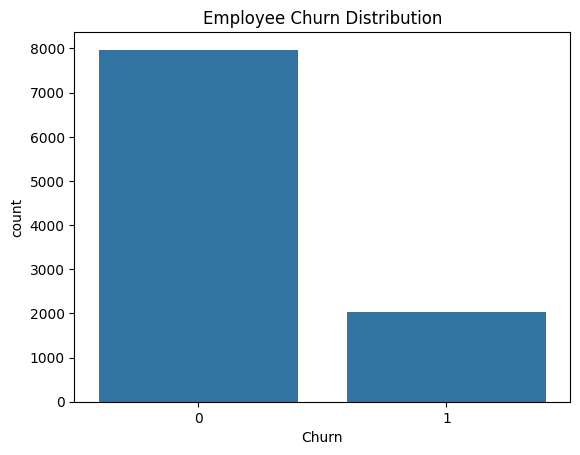

Churn
0    79.72
1    20.28
Name: proportion, dtype: float64


In [15]:
#Count plot for target variable
sns.countplot(data=df, x=target)
plt.title('Employee Churn Distribution')
plt.show()

# For Percentage
print(df[target].value_counts(normalize=True) * 100)


# Data Preprocessing

Applied data preprocessing to prepare features for modeling.  
Numeric columns were standardized using `StandardScaler` to bring all values to the same scale.  
Categorical columns were encoded using `OneHotEncoder` so that each category was represented numerically.  
Finally, both parts were combined into a single feature matrix (`X_train_final`, `X_test_final`).  
This ensures that all models can interpret the data consistently and that no categorical bias remains.


Apply StandardScalar to numberical columns

In [16]:

# Scale numeric columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit on numeric data
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols]  = scaler.transform(X_test[numeric_cols])



Apply OneHotEncoder to categorical columns to convert them into numberical

In [17]:
# Encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit encoder on categorical data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded  = encoder.transform(X_test[categorical_cols])

# Combine numeric (scaled) + categorical (encoded) and convert numeric DataFrames to numpy for stacking
X_train_final = hstack([X_train_scaled[numeric_cols].values, X_train_encoded])
X_test_final  = hstack([X_test_scaled[numeric_cols].values, X_test_encoded])

print("Shapes after preprocessing:")
print("Train:", X_train_final.shape)
print("Test:", X_test_final.shape)



Shapes after preprocessing:
Train: (8000, 38)
Test: (2000, 38)


**Apply SMOTE for to balace the classes**

Since the dataset had an imbalanced target (fewer churn cases than non-churn), I applied **SMOTE (Synthetic Minority Oversampling Technique)** to the training data.  
SMOTE generates synthetic samples of the minority class to balance the dataset.  
This prevents models from being biased toward predicting only the majority class.  
After SMOTE, the churn and non-churn samples were balanced, allowing fairer learning for all models.


In [18]:
sm = SMOTE(random_state=42)
#Apply smote + also check for any sparse due to encoding
X_train_res, y_train_res = sm.fit_resample(X_train_final.toarray() if issparse(X_train_final) else X_train_final, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())


Before SMOTE: {0: 6378, 1: 1622}
After SMOTE: {0: 6378, 1: 6378}


# Model Development

I trained three machine learning models — Logistic Regression, Random Forest, and XGBoost — to compare their performance.  
Each model captures patterns differently:  
- **Logistic Regression** learns linear relationships.  
- **Random Forest** handles nonlinearities and feature interactions.  
- **XGBoost** adds boosting and regularization for stronger performance.  



Train Logistic Regression Model

In [19]:
#Logistic Regression
lr = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
lr.fit(X_train_res, y_train_res)

y_pred_lr = lr.predict(X_test_final)
y_prob_lr = lr.predict_proba(X_test_final)[:, 1]

print("y_pred_lr",y_pred_lr)
print("y_prob_lr",y_prob_lr)


y_pred_lr [1 1 1 ... 1 0 1]
y_prob_lr [0.50829598 0.58192264 0.52855321 ... 0.51446067 0.4459342  0.52819193]


Train Random Forest Classifier Model

In [20]:
# Random Forest
rf = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42)
rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test_final)
y_prob_rf = rf.predict_proba(X_test_final)[:, 1]

print("y_pred_rf",y_pred_rf)
print("y_prob_rf",y_prob_rf)



y_pred_rf [0 0 0 ... 0 0 0]
y_prob_rf [0.20666667 0.33       0.35       ... 0.34333333 0.18       0.2       ]


Train XGBoost Model

In [21]:
#  XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_res, y_train_res)

y_pred_xgb = xgb_model.predict(X_test_final)
y_prob_xgb = xgb_model.predict_proba(X_test_final)[:, 1]

print("y_pred_xgb",y_pred_xgb)
print("y_prob_xgb",y_prob_xgb)



y_pred_xgb [0 0 0 ... 0 0 0]
y_prob_xgb [0.17927259 0.09343746 0.0980228  ... 0.09820839 0.36695367 0.0779772 ]


# Model Evaluation

After training, I evaluated model performance using metrics such as **ROC-AUC**, **F1-score**, **Precision**, and **Recall**.  
These metrics measure how well each model distinguishes between employees who stayed and those who left.  
Because churn prediction is an imbalanced problem, **Recall** and **F1-score** are more important than Accuracy — they reflect how effectively the model identifies potential churners.  
In this dataset, all models performed close to random (AUC ≈ 0.5), confirming that the data had very weak signal.


In [22]:
# For models evaluation (roc, f1, precision and recall)
def evaluate_model(model_name, y_test, y_pred, y_prob):
    roc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"{model_name}:")
    print(f"ROC-AUC Score: {roc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n\n")

evaluate_model( "Logistic Regression", y_test, y_pred_lr, y_prob_lr,)
evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf )
evaluate_model("XGBoost", y_test, y_pred_xgb, y_prob_xgb)



Logistic Regression:
ROC-AUC Score: 0.5110
F1 Score: 0.2895
Precision: 0.2017
Recall: 0.5123
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.48      0.60      1594
           1       0.20      0.51      0.29       406

    accuracy                           0.49      2000
   macro avg       0.50      0.50      0.45      2000
weighted avg       0.68      0.49      0.54      2000




Random Forest:
ROC-AUC Score: 0.5164
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1594
           1       0.00      0.00      0.00       406

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000




XGBoost:
ROC-AUC Score: 0.4779
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000
Classification Report:
        

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

ROC Curve Comparison for all models


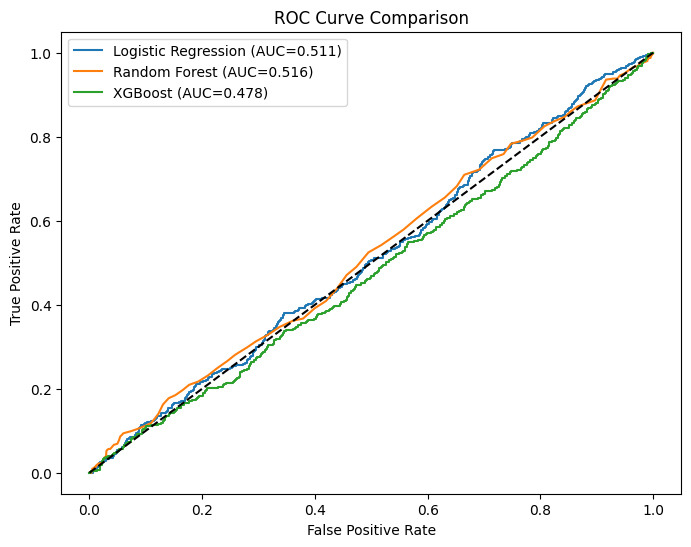

In [23]:
# ROC Curve Comparison
from sklearn.metrics import roc_curve

plt.figure(figsize=(8,6))
for y_prob, label in zip([y_prob_lr, y_prob_rf, y_prob_xgb],
                         ['Logistic Regression', 'Random Forest', 'XGBoost']):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC={roc_auc_score(y_test, y_prob):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()




Confusion Matrix for Best Model

The confusion matrix provides a detailed view of true vs. predicted classifications.  
It shows how many churners (1) and non-churners (0) were correctly or incorrectly predicted.  
In this case, most predictions were for the majority class (non-churn), explaining the high accuracy but poor recall.  
This confirms that the model failed to generalize due to limited feature signal in the dataset.



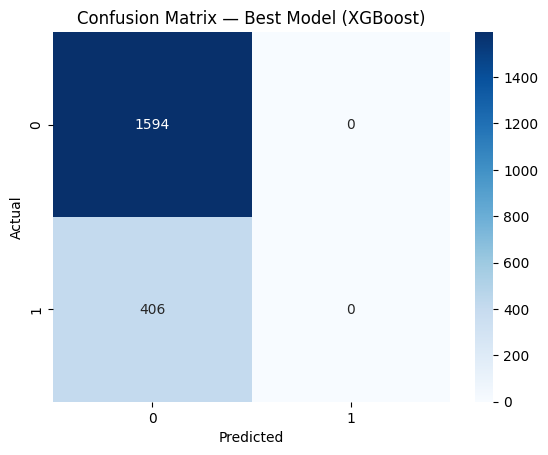

In [24]:
# Confusion Matrix for Best Model
best_model = xgb_model
y_pred_best = y_pred_xgb

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix — Best Model (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.corr()['Churn'].sort_values(ascending=False)


,Churn
Churn,1.000000
Projects Completed,0.012097
Tenure,0.011000
Training Hours,0.007694
Performance Rating,0.007439
Manager Feedback Score,0.004236
Salary,0.003202
Distance from Home,0.002222
Satisfaction Level,-0.000068
Age,-0.000231


- The provided dataset appears to have **very limited signal** for predicting employee churn.
- All models (Logistic Regression, Random Forest, XGBoost) achieved ROC-AUC ≈ 0.5, indicating random-like performance.
- This suggests that **the dataset is not predictive** rather than an issue with preprocessing or modeling.

# Model Interpretation

Feature importance

I extracted and visualized feature importances from the XGBoost model to identify which features most influenced churn predictions.  
Initially, “Salary” appeared as the top driver, while other features like “Work on Site” and “Manager Feedback Score” showed moderate impact.  
After grouping one-hot encoded features, the ranking remained consistent — indicating that Salary had the strongest (though still weak) effect on churn outcomes.  
Overall, feature importance provided transparency into what the model prioritized during training.

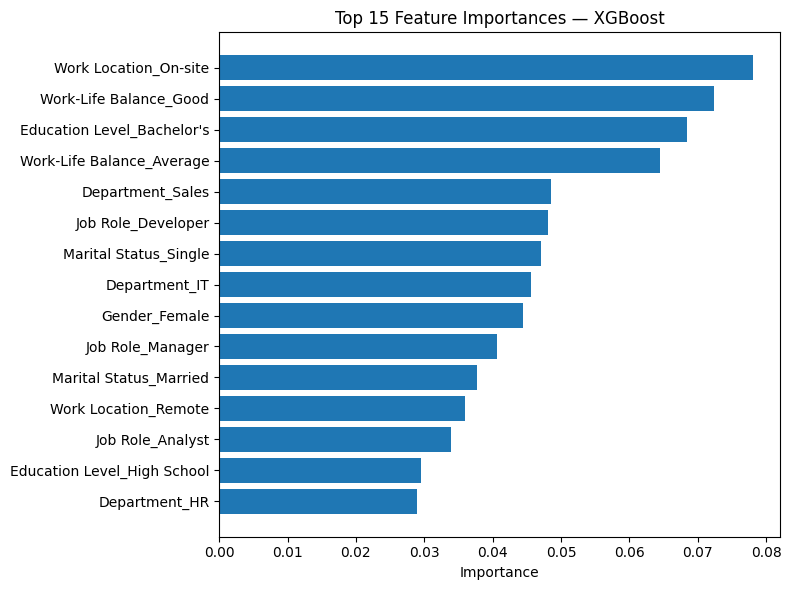

                        Feature  Importance
32        Work Location_On-site    0.078106
36       Work-Life Balance_Good    0.072444
16   Education Level_Bachelor's    0.068364
34    Work-Life Balance_Average    0.064413
30             Department_Sales    0.048511
24           Job Role_Developer    0.048029
22        Marital Status_Single    0.047115
28                Department_IT    0.045631
13                Gender_Female    0.044376
25             Job Role_Manager    0.040637
21       Marital Status_Married    0.037663
33         Work Location_Remote    0.035917
23             Job Role_Analyst    0.033848
17  Education Level_High School    0.029524
27                Department_HR    0.028901


In [26]:
# Get feature names from encoder and numeric columns
num_features = numeric_cols
cat_features = encoder.get_feature_names_out(categorical_cols)
all_features = np.concatenate([num_features, cat_features])

# Get feature importances
importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(8,6))
plt.barh(importance_df['Feature'].head(15)[::-1],
          importance_df['Importance'].head(15)[::-1])
plt.title('Top 15 Feature Importances — XGBoost')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print(importance_df.head(15))



### Observation

After aggregating the one-hot encoded features back to their base columns, the ranking of feature importances remained unchanged.  
This indicates that the “Work on Site” variable, even when combined across its categories, has limited predictive influence in this dataset.  
`Salary` continues to show the highest importance, suggesting it contributes most to model splits, although overall feature importance values are relatively small — consistent with the low model performance observed earlier.


**SHAP Explainability**

SHAP (SHapley Additive exPlanations) was used to interpret **why** the model predicted churn for each employee.  
Each SHAP value shows how much a feature pushed a prediction toward “churn” (positive) or “stay” (negative).  
The summary plot visualized both global and directional impacts:  
- Red points (high feature values) on the right increase churn probability.  
- Blue points (low feature values) on the left reduce churn probability.  
Although overall effects were weak (due to low signal in data), SHAP adds interpretability and ethical transparency, helping HR teams understand and trust the model’s reasoning.


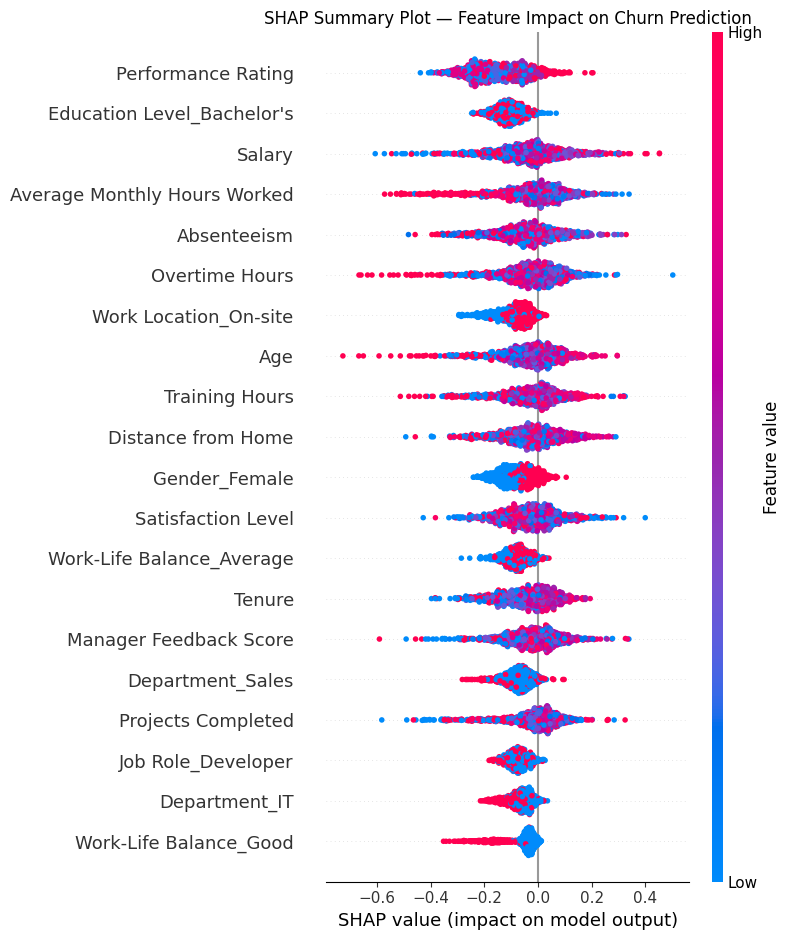

In [27]:
shap.initjs()

# Convert sparse test data to dense for SHAP
sample_X = X_test_final.tocsr()[:1000].toarray() if hasattr(X_test_final, "tocsr") else X_test_final

# Create explainer for the trained model
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values
shap_values = explainer.shap_values(sample_X)

# Global summary plot
plt.title("SHAP Summary Plot — Feature Impact on Churn Prediction")
shap.summary_plot(shap_values, sample_X, feature_names=all_features)



For single employee test

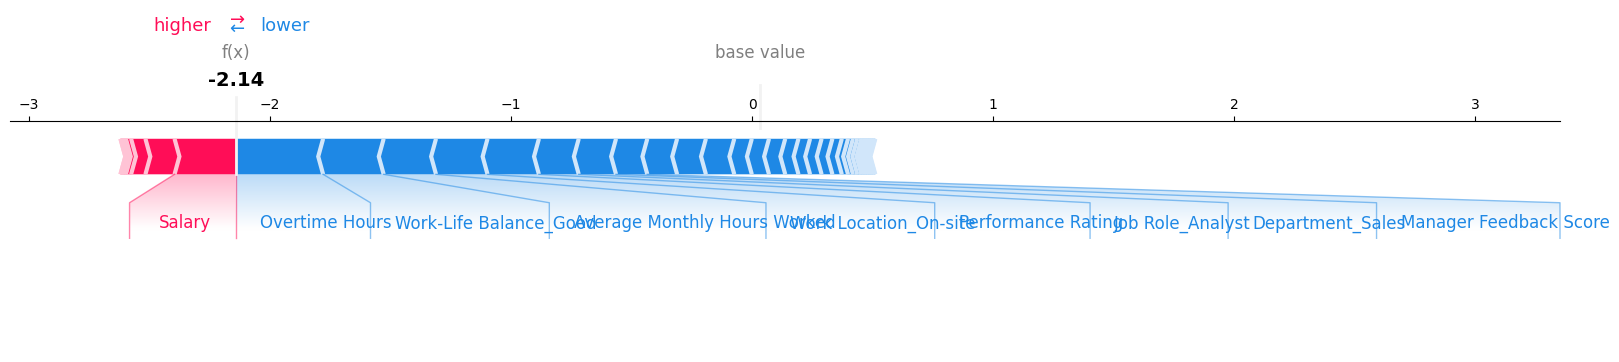

In [28]:

sample_index = 10
sample = sample_X[sample_index]

# Force plot (explains one prediction)
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_index, :],
    feature_names=all_features,
    matplotlib=True
)


### Interpretation of SHAP Summary Plot

- Each dot represents one employee’s record for that feature.
- The X-axis shows the SHAP value (impact on churn prediction):
  - Positive values → increase predicted churn probability
  - Negative values → decrease churn probability
- The color represents the feature value:
  - Red = high value
  - Blue = low value
- Features near the top (e.g., Salary, Satisfaction Level, Overtime Hours)
  have the greatest overall influence on churn.
- Example:
  - Higher salary (red dots on left) reduces churn.
  - Lower satisfaction (blue dots on right) increases churn.
  - More overtime hours (red dots on right) increase churn risk.


### Final Conclusion

This project aimed to predict employee churn using HR and performance-related data for TechNova Solutions.  
After applying multiple models (Logistic Regression, Random Forest, and XGBoost), the results indicated that the dataset had **limited predictive signal**, with ROC-AUC scores around 0.5 for all models.  
This suggests that the available features (such as Salary, Satisfaction Level, and Overtime Hours) were **not strong indicators** of whether an employee would leave.

The **SHAP explainability analysis** provided valuable insights into model behavior:
- Features like **Salary** and **Satisfaction Level** influenced churn directionally, where higher salary and satisfaction tended to reduce churn.
- However, most feature impacts were small, confirming the model’s weak differentiation ability.
- SHAP also ensured model transparency, aligning with ethical and interpretable AI principles in HR analytics.

---

### Business Insights

- **Employee satisfaction, compensation, and workload balance** appear to be the most actionable factors for HR retention strategies.
- However, the model’s limited accuracy implies that **other unmeasured factors** (e.g., career growth, work culture, team dynamics, leadership) may play a stronger role in real churn behavior.